<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Convolutional Neural Networks: 
<br>Introduction to Computer Vision</center></font></h1>
<h1><center>Plants Seedling Classification</center></h1>
<h3><center>Charlcye Mitchell, April 2023</center></h3>

#Problem Definition

##Context
In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

##Objective
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

##Data Description
This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
*   images.npy
*   Label.csv

Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Plant species**

*   Black-grass
*   Charlock
*   Cleavers
*   Common Chickweed
*   Common Wheat
*   Fat Hen
*   Loose Silky-bent
*   Maize
*   Scentless Mayweed
*   Shepherds Purse
*   Small-flowered Cranesbill
*   Sugar beet


#Exploratory Data Analysis

###Importing the necessary packages

In [75]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.utils import np_utils                                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

###Reading the Datasets

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [76]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labels.csv')

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [78]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

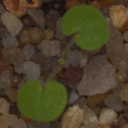

In [79]:
cv2_imshow(images[5])

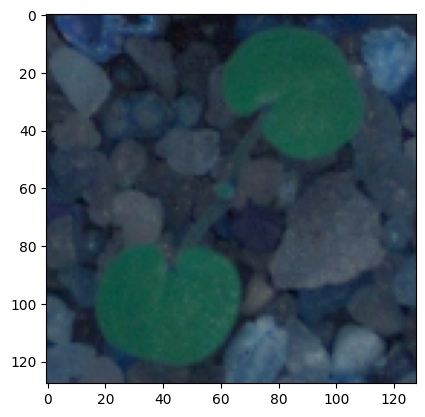

In [80]:
plt.imshow(images[5])

In [81]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

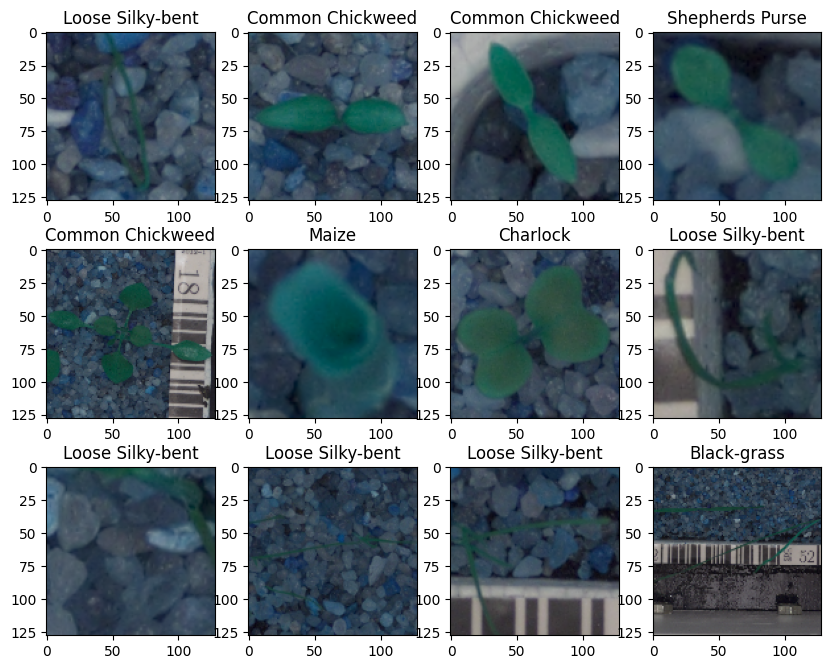

In [82]:
plot_images(images,labels)

The images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format. We should consider converting the BGR images to RGB images.

## **Exploratory Data Analysis** 

<b> Checking for data imbalance

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


<Axes: xlabel='Label'>

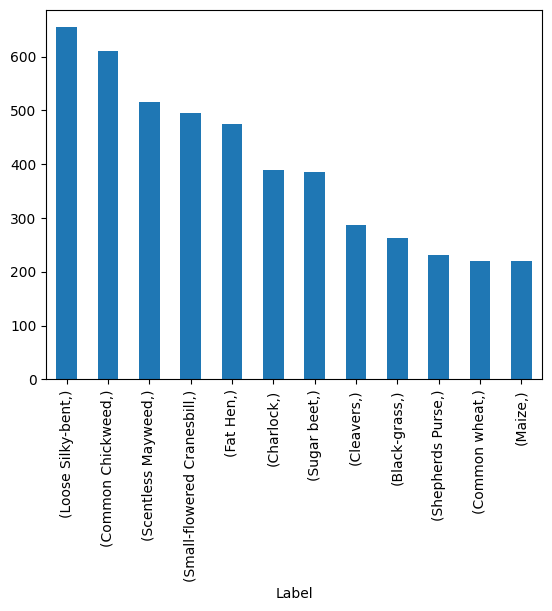

In [83]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(labels)
print("Classes: " + str(le.classes_))
encodeLabels = le.transform(labels)

# Make labels categorical
TrainLabel = np_utils.to_categorical(encodeLabels)
num_clases = TrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
labels.value_counts().plot(kind='bar')

In [84]:
labels_dict = {
    
    'Black-grass' : 0,
    'Charlock' : 1, 
    'Cleavers' : 2, 
    'Common Chickweed' : 3, 
    'Common wheat' : 4,
    'Fat Hen' : 5,
    'Loose Silky-bent' : 6,
    'Maize' : 7,
    'Scentless Mayweed' : 8,
    'Shepherds Purse' : 9,
    'Small-flowered Cranesbill' : 10,
    'Sugar beet' : 11
}

In [85]:
labels_cat = preprocessing.LabelEncoder()
labels_cat.fit(labels)
print('Classes Names = '+str(labels_cat.classes_))
encodedlabels = labels_cat.transform(labels)
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print("The no of classes in dataset - "+str(classes))

Classes Names = ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
The no of classes in dataset - 12


<Axes: ylabel='None'>

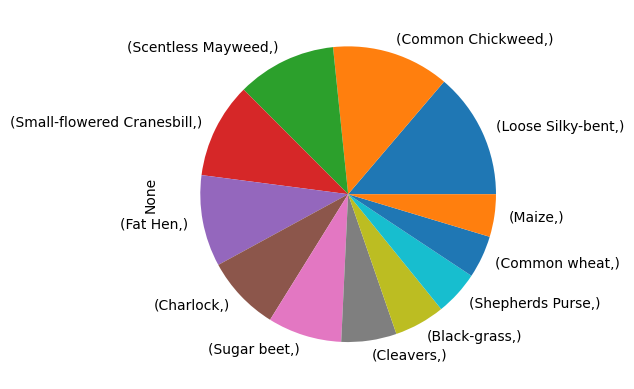

In [86]:
labels.value_counts().plot(kind='pie')

In [87]:
## Print number of images for each species
# create a group using groupby
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

# Illustrate the insights based on EDA

* There are not a lot of images for each species.
* The dataset is imbalanced. 
-- For example, there are 655 training samples (14% of the total training set) belong to "loose silky-bent", while there are only 222 samples (5%) that belong to "common wheat".


# Data Pre - Processing
*   Try to remove unwanted noise from the images using Gaussian Blurring 
*   Apply the normalization 
*   Plot the images before and after the pre-processing steps 
*   Split the data into train and test

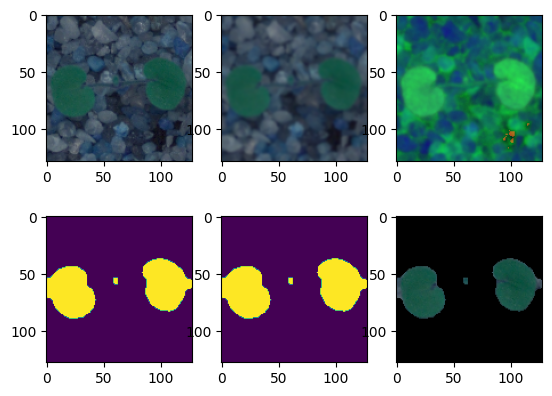

In [88]:
clearImages = []
examples = []; getEx = True
for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearImages.append(clear)  # Append image without backgroung

    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearImages = np.asarray(clearImages)

In [89]:
#Normalize images
clearImages = clearImages / 255

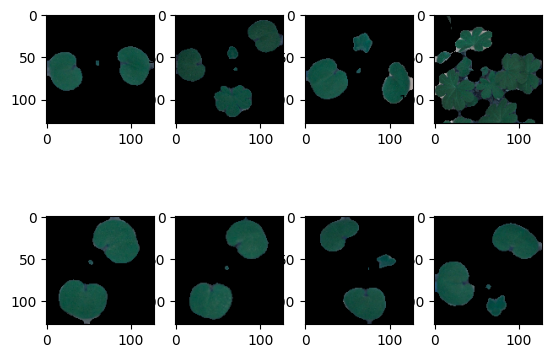

In [90]:
# Show sample result before and after normalization
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearImages[i])

# Make data compatible
*   Convert labels from digits to one hot vector. 
*   Check the shape of the data. Reshape the data into shapes compatible with Keras models, if already not compatible.

In [91]:
label = labels.replace(labels_dict)
label

,Label
0,10
1,10
2,10
3,10
4,10
...,...
4745,6
4746,6
4747,6
4748,6


In [92]:
X = images
y = label.iloc[:,-1]
y = np.array(y)
print(X.shape, y.shape)

(4750, 128, 128, 3) (4750,)


In [93]:
#Split data into train / test
#As we have few images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
#We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=labels)

In [94]:
print(X_train.shape, y_train.shape)

(4275, 128, 128, 3) (4275,)


In [95]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

y_train

array([0, 4, 1, ..., 2, 0, 0])

# Model building
* Build Convolution Neural Network 
* Use different layers in the model

In [96]:
model_cnn = Sequential([
                        layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (128, 128, 3)),
                        layers.experimental.preprocessing.RandomRotation(0.1),
                        layers.experimental.preprocessing.RandomZoom(0.1),
                        
                        layers.Conv2D(16, (3,3), padding= 'same', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Conv2D(32, (3,3), padding= 'same', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Conv2D(64, (3,3), padding= 'same', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Dropout(0.2),

                        layers.Flatten(),

                        layers.Dense(128, activation='relu'),
                        layers.Dense(12, activation='softmax')

])

model_cnn.compile(optimizer = 'adam',
                  loss  = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics = 'accuracy')

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_3 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)       

In [97]:
model_cnn_s = model_cnn.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
134/134 [==============================] - 4s 16ms/step - loss: 2.3667 - accuracy: 0.1794
Epoch 2/30
134/134 [==============================] - 2s 16ms/step - loss: 1.6237 - accuracy: 0.4339
Epoch 3/30
134/134 [==============================] - 2s 17ms/step - loss: 1.2718 - accuracy: 0.5588
Epoch 4/30
134/134 [==============================] - 2s 15ms/step - loss: 1.0963 - accuracy: 0.6306
Epoch 5/30
134/134 [==============================] - 2s 16ms/step - loss: 0.9626 - accuracy: 0.6737
Epoch 6/30
134/134 [==============================] - 2s 15ms/step - loss: 0.8460 - accuracy: 0.7228
Epoch 7/30
134/134 [==============================] - 2s 15ms/step - loss: 0.7585 - accuracy: 0.7432
Epoch 8/30
134/134 [==============================] - 2s 16ms/step - loss: 0.7190 - accuracy: 0.7607
Epoch 9/30
134/134 [==============================] - 2s 17ms/step - loss: 0.6732 - accuracy: 0.7731
Epoch 10/30
134/134 [==============================] - 2s 16ms/step - loss: 0.6348 - accura

Our model accuracy is ~ 90%. 

In [98]:
y_pred = model_cnn.predict(X_test_scaled)
y_pred = [np.argmax(item) for item in y_pred]
y_pred[1]

15/15 [==============================] - 0s 5ms/step


10

# Model Performance Evaluation

In [99]:
from sklearn.metrics import classification_report
print('Classification Report :\n', classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.26      0.23      0.24        26
           1       0.97      0.74      0.84        39
           2       0.83      0.86      0.85        29
           3       0.96      0.84      0.89        61
           4       0.88      0.68      0.77        22
           5       0.83      0.90      0.86        48
           6       0.68      0.82      0.74        65
           7       0.87      0.91      0.89        22
           8       0.86      0.85      0.85        52
           9       0.77      0.74      0.76        23
          10       0.84      0.92      0.88        50
          11       0.76      0.82      0.78        38

    accuracy                           0.80       475
   macro avg       0.79      0.77      0.78       475
weighted avg       0.81      0.80      0.80       475



In [100]:
# len(y_pred)
y_pred[0:10]
y_test[:10]

array([ 3, 10, 10, 10,  1, 10, 11,  6, 10, 10])

In [101]:
def show(X, y, index):
  plt.imshow(X[index])
  for key, value in labels_dict.items():
    if value == y[index]:
      plt.xlabel(key)
      plt.show()

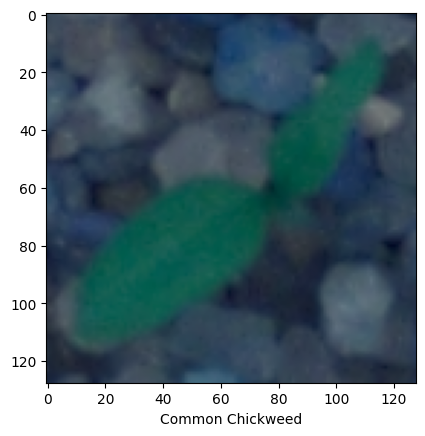

In [102]:
show(X_test_scaled, y_test, 0)

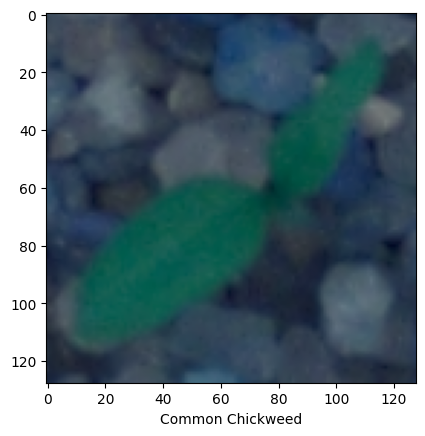

In [103]:
show(X_test_scaled, y_pred, 0)

In [104]:
#Test the model with input image
import PIL
def external_img_prediction(path):
  img = PIL.Image.open(path)
  img = np.array(img)
  plt.imshow(img)
  img_resized = np.resize(img,(1,128,128,3))
  img_scaled = img_resized/255
  y_pred = model_cnn.predict(img_scaled)
  
  for key, value in labels_dict.items():
    if value == np.argmax(y_pred):
      plt.xlabel(key)

dict_keys(['loss', 'accuracy'])


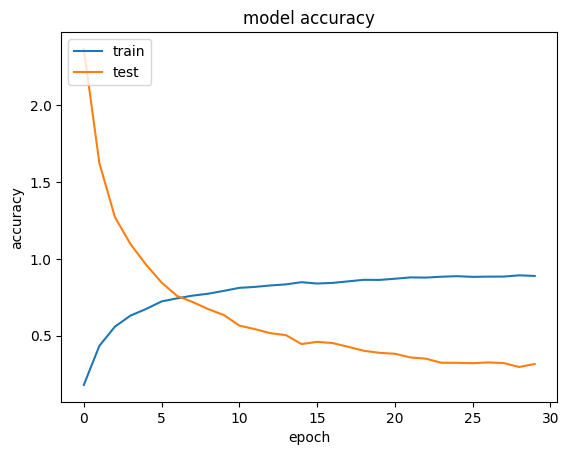

In [105]:
print(model_cnn_s.history.keys())
# summarize history for accuracy
plt.plot(model_cnn_s.history['accuracy'])
plt.plot(model_cnn_s.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion and key takeaways

A CNN-model + Conv2D (16, 32, and 64 filters) + MaxPool2D Dropout + Flatten + Dense is a good combination for image classification, achieving ~90% accurancy for all classes.